<h1 style="color:blue;">Outline of Scenario 12 notebooks:</h1> 

- **C1.S12.Py01 – Label encoding Grade data (Scenario12_Presentation.ipynb)**
- C1.S12.Py02 - Building a regression model with backwards elimination (Scenario12_DataModeling.ipynb)
- C1.S12.Py03 - Reviewing the final regression model (Scenario12_DataModeling.ipynb)
- C1.S12.Py04 - The CRISP approach in brief 
- C1.S12.Py05 - Using Markdown to emphasize CRISP approach in code (CRISP_DataModeling_Template.ipynb)




In [3]:
#Code Block 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#style options 

%matplotlib inline  
#if you want graphs to automatically without plt.show

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

plt.style.use('seaborn-v0_8') #a style that can be used for plots - see style reference above



In [4]:
#Code Block 2
df = pd.read_csv('data/Scenario12.csv', index_col = 0, header=0) 
    #DOES set the first column to the index
    # and the top row as the headers

<h2 style="color:blue;">Label encoding Grade data</h2> 

## Creating the final dataset
- Features that are objects
    - Convert to dummy variables
    - Convert to linear numerical values
    - Drop the feature
- Null values in integer or float features
    - Fill in NaNs
    - Drop rows (Members/records)
    - Drop columns (Features)

In [7]:
#Code Block 3
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  int64  
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Balance              29930 non-null  int64  
 8   Total Revolving Credit Line    29930 non-null  int64  
 9   Term                           29930 non-null  int64  
 10  Grade                          29930 non-null  object 
 11  Employee Title                 28266 non-null  object 
 12  Length of Employment           29930 non-null  floa

In [8]:
#Code Block 4
df.head()

,Member ID,Loan ID,Origination Date,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Employee Title,Length of Employment,Zip Code of Residence,State of Residence,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,TermString,Day,Month,Year,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT,Own_RevLine_act,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,149512,848058,8/18/19,19.05,7200,154930,58000,3874,4300,36,D,Arkwright,9.0,028xx,RI,0,0,6,36 months,6,8,2019,0.124138,2.671207,0.900930,0.066793,1,58000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,407046,659709,5/21/18,10.16,16000,29116,55000,6840,24800,36,B,School,4.0,926xx,CA,0,1,12,36 months,0,5,2018,0.290909,0.529382,0.275806,0.124364,1,55000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,507531,601368,1/1/18,10.16,35000,60019,130000,23025,55800,36,B,gSEMI,8.0,940xx,CA,0,1,11,36 months,0,1,2018,0.269231,0.461685,0.412634,0.177115,1,130000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,513904,761341,1/3/19,6.03,21000,37603,120000,18641,85031,36,A,Fidelity Investments,10.0,021xx,MA,0,0,16,36 months,3,1,2019,0.175000,0.313358,0.219226,0.155342,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,603349,885844,11/17/19,16.29,15000,227890,72000,11702,26300,36,C,NaN,6.0,341xx,FL,0,1,18,36 months,6,11,2019,0.208333,3.165139,0.444943,0.162528,1,72000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### Objects to convert/drop or that have been converted/dropped.
- Member ID	***(DROP)*** 
- Loan ID ***(DROP)*** 
- Origination Date      ***(DROP)***           
    - Also drop Day, Month, Year
- Grade                 ***(CONVERT TO LINEAR NUMERIC VALUE or DUMMY VARIABLES)***
- Employee Title        ***(DROP)*** 
- Home Ownership        ***(DUMMY VARIABLES)***     
- Loan Purpose          ***(DUMMY VARIABLES)*** 
- Zip Code of Residence ***(DROP)***   
- State of Residence    ***(DROP)***    
- TermString            ***(DROP)*** 

In [10]:
#Code Block 5
df_reg = df.copy()

In [12]:
#Code Block 6
df_reg['Grade'].value_counts(dropna=False)

Grade
B    11322
C     7278
A     5305
D     3849
E     1484
F      613
G       79
Name: count, dtype: int64

<h3 style="color:blue;">Create Dummy Variable for Grade</h3> 

In [23]:
#Code Block 7

dummies_Grade = pd.get_dummies(df_reg['Grade'], drop_first = True)
#Can drop_first = True because 'A' is the first alphabetically.  
df_reg = pd.concat([df_reg, dummies_Grade], axis = 1)


#Drop Grade
df_reg = df_reg.drop(['Grade'], axis = 1)
df_reg.head()

KeyError: 'Grade'

In [ ]:
#Code Block 8
df_reg.columns

In [26]:
#Code Block 9

X = df_reg[['Amount Funded', 'Total Debt','Annual Income', 'Total Revolving Credit Line',
                 'Term',  'Length of Employment', 'Delinquencies Past 24 Months',
                 'Credit Inquires Last 6 Months', 'Open Accounts', 
                 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
                 'Income Verification', 'IncVer_Income_act', 'car', 'credit_card', 'home_improvement',
                 'house', 'major_purchase', 'medical', 'moving', 'other',
                 'renewable_energy', 'small_business', 'vacation', 
                 'wedding', 'OTHER', 'OWN', 'RENT', 'B',
                 'C', 'D', 'E', 'F', 'G']]
y = df_reg[['Interest Rate']]

In [28]:
#Code Block 10
import statsmodels
import statsmodels.api as sm

In [29]:
#Code Block 11
X = sm.add_constant(X) # adding a constant

reg1 = sm.OLS(y, X).fit()

predictions1 = reg1.predict(X) 
resid1 = reg1.resid
reg1.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Look at AIC and BIC to choose between the models

- AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, so that a lower AIC means a model is considered to be closer to the truth. 
- BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup, so that a lower BIC means that a model is considered to be more likely to be the true model. 
- https://www.methodology.psu.edu/resources/AIC-vs-BIC/

In [31]:
#Code Block 12

#Create Predictions dataframe
df_predictions1 = pd.DataFrame(predictions1)
df_predictions1=df_predictions1.rename(columns = {0:'Int_Pred_dm'})

#Create Residuals dataframe
df_resid1 = pd.DataFrame(resid1)
df_resid1=df_resid1.rename(columns = {0:'Resid_dm'})

NameError: name 'predictions1' is not defined

In [35]:
#Code Block 13
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
#Code Block 14
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns #adds a column with the labels
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<h3 style="color:blue;">Label Encode Grade</h3>


In [40]:
#Code Block 15
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [41]:
#Code Block 16
df_reg_le = df.copy()

In [44]:
#Code Block 17
df_reg_le['Grade'].value_counts()

Grade
B    11322
C     7278
A     5305
D     3849
E     1484
F      613
G       79
Name: count, dtype: int64

In [46]:
#Code Block 18
df_reg_le['Grade'] = lc.fit_transform(df_reg_le['Grade'])
df_reg_le['Grade'].value_counts()

Grade
1    11322
2     7278
0     5305
3     3849
4     1484
5      613
6       79
Name: count, dtype: int64

<h3 style="color:blue;">Drop Other Object Features</h3>


In [49]:
#Code Block 19
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Origination Date               29930 non-null  object 
 3   Interest Rate                  29930 non-null  float64
 4   Amount Funded                  29930 non-null  int64  
 5   Total Debt                     29930 non-null  int64  
 6   Annual Income                  29930 non-null  int64  
 7   Revolving Balance              29930 non-null  int64  
 8   Total Revolving Credit Line    29930 non-null  int64  
 9   Term                           29930 non-null  int64  
 10  Employee Title                 28266 non-null  object 
 11  Length of Employment           29930 non-null  float64
 12  Zip Code of Residence          29930 non-null  obje

### Manual way to drop object features

In [52]:
#Code Block 20
df_reg_le_manual = df_reg_le.drop(['Origination Date', 'Employee Title', 'Zip Code of Residence', 'State of Residence', 'TermString'], axis = 1)
df_reg_le_manual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Interest Rate                  29930 non-null  float64
 3   Amount Funded                  29930 non-null  int64  
 4   Total Debt                     29930 non-null  int64  
 5   Annual Income                  29930 non-null  int64  
 6   Revolving Balance              29930 non-null  int64  
 7   Total Revolving Credit Line    29930 non-null  int64  
 8   Term                           29930 non-null  int64  
 9   Grade                          29930 non-null  int64  
 10  Length of Employment           29930 non-null  float64
 11  Delinquencies Past 24 Months   29930 non-null  int64  
 12  Credit Inquires Last 6 Months  29930 non-null  int6

### Easier way to exclude object features

In [55]:
#Code Block 21
df_reg_le = df_reg_le.select_dtypes(exclude=['object'])
df_reg_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 30063
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Member ID                      29930 non-null  int64  
 1   Loan ID                        29930 non-null  int64  
 2   Interest Rate                  29930 non-null  float64
 3   Amount Funded                  29930 non-null  int64  
 4   Total Debt                     29930 non-null  int64  
 5   Annual Income                  29930 non-null  int64  
 6   Revolving Balance              29930 non-null  int64  
 7   Total Revolving Credit Line    29930 non-null  int64  
 8   Term                           29930 non-null  int64  
 9   Grade                          29930 non-null  int64  
 10  Length of Employment           29930 non-null  float64
 11  Delinquencies Past 24 Months   29930 non-null  int64  
 12  Credit Inquires Last 6 Months  29930 non-null  int6

In [57]:
#Code Block 22
df_reg_le.columns

Index(['Member ID', 'Loan ID', 'Interest Rate', 'Amount Funded', 'Total Debt',
       'Annual Income', 'Revolving Balance', 'Total Revolving Credit Line',
       'Term', 'Grade', 'Length of Employment', 'Delinquencies Past 24 Months',
       'Credit Inquires Last 6 Months', 'Open Accounts', 'Day', 'Month',
       'Year', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Own_RevLine_act', 'car', 'credit_card', 'debt_consolidation',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

### To create X you can also exclude features 

In [60]:
#Code Block 23

X = df_reg_le.drop(['Member ID', 'Loan ID', 'Day', 'Month', 'Year', 'Interest Rate'], axis = 1)
y = df_reg[['Interest Rate']]

In [62]:
#Code Block 24
X.head()

,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Length of Employment,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT,Own_RevLine_act,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7200,154930,58000,3874,4300,36,3,9.0,0,0,6,0.124138,2.671207,0.900930,0.066793,1,58000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,16000,29116,55000,6840,24800,36,1,4.0,0,1,12,0.290909,0.529382,0.275806,0.124364,1,55000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,35000,60019,130000,23025,55800,36,1,8.0,0,1,11,0.269231,0.461685,0.412634,0.177115,1,130000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,21000,37603,120000,18641,85031,36,0,10.0,0,0,16,0.175000,0.313358,0.219226,0.155342,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,15000,227890,72000,11702,26300,36,2,6.0,0,1,18,0.208333,3.165139,0.444943,0.162528,1,72000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
#Code Block 25
X = sm.add_constant(X) # adding a constant

reg_le = sm.OLS(y, X).fit()

predictions_le = reg_le.predict(X) 
resid_le = reg_le.resid
reg_le.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Interest Rate   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.152e+04
Date:                Wed, 09 Oct 2024   Prob (F-statistic):               0.00
Time:                        21:00:28   Log-Likelihood:                -46078.
No. Observations:               29930   AIC:                         9.222e+04
Df Residuals:                   29896   BIC:                         9.251e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             5.7645      0.052    111.757      0.000       5.663       5.866
Amount Funded                  9.813e-07   2.12e-06      0.462      0.644   -3.18e-06    5.14e-06
Total Debt                    -3.531e-07   1.28e-07     -2.769      0.006   -6.03e-07   -1.03e-07
Annual Income                 -4.473e-06   4.93e-07     -9.065      0.000   -5.44e-06   -3.51e-06
Revolving Balance              6.166e-06   1.42e-06      4.343      0.000    3.38e-06    8.95e-06
Total Revolving Credit Line   -1.186e-05   6.86e-07    -17.288      0.000   -1.32e-05   -1.05e-05
Term                              0.0141      0.001     15.250      0.000       0.012       0.016
Grade                             3.0504      0.007    408.137      0.000       3.036       3.065
Length of Employment              0.0010      0.002      0.520      0.603      -0.003       0.005
Delinquencies Past 24 Months      0.2668      0.018     14.682      0.000       0.231       0.302
Credit Inquires Last 6 Months     0.1736      0.007     25.432      0.000       0.160       0.187
Open Accounts                     0.0241      0.002     14.707      0.000       0.021       0.027
Loan_Income                       0.6916      0.150      4.622      0.000       0.398       0.985
Debt_Income                      -0.0482      0.010     -4.650      0.000      -0.068      -0.028
RevBal_Line                       1.2514      0.048     25.896      0.000       1.157       1.346
RevBal_Income                     0.0898      0.086      1.040      0.298      -0.080       0.259
Income Verification              -0.1071      0.031     -3.470      0.001      -0.168      -0.047
IncVer_Income_act              3.627e-06   4.07e-07      8.910      0.000    2.83e-06    4.43e-06
MORTGAGE                          1.3945      0.033     42.364      0.000       1.330       1.459
OTHER                             1.4173      0.107     13.206      0.000       1.207       1.628
OWN                               1.4745      0.042     35.192      0.000       1.392       1.557
RENT                              1.4782      0.031     47.125      0.000       1.417       1.540
Own_RevLine_act               -7.623e-07   1.06e-06     -0.719      0.472   -2.84e-06    1.32e-06
car                               0.2263      0.060      3.769      0.000       0.109       0.344
credit_card                       0.4181      0.026     16.126      0.000       0.367       0.469
debt_consolidation                0.4350      0.024     18.174      0.000       0.388       0.482
home_improvement                  0.4040      0.036     11.347      0.000       0.334       0.474
house                             0.3346      0.086      3.888      0.000       0.166       0.503
major_purchase                    0.2306     

In [66]:
#Code Block 26

#Create Predictions dataframe
df_predictions_le = pd.DataFrame(predictions_le)
df_predictions_le=df_predictions_le.rename(columns = {0:'Int_Pred_le'})

#Create Residuals dataframe
df_resid_le = pd.DataFrame(resid_le)
df_resid_le=df_resid_le.rename(columns = {0:'Resid_le'})


In [68]:
#Code Block 27



#Concat results into one dataframe
df_reg_results = pd.concat([df_reg, df_predictions1, df_resid1, df_predictions_le, df_resid_le], axis=1)

df_reg_results.head()

NameError: name 'df_predictions1' is not defined

In [70]:
#Code Block 28
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
#Code Block 29
df_reg_le.columns

Index(['Member ID', 'Loan ID', 'Interest Rate', 'Amount Funded', 'Total Debt',
       'Annual Income', 'Revolving Balance', 'Total Revolving Credit Line',
       'Term', 'Grade', 'Length of Employment', 'Delinquencies Past 24 Months',
       'Credit Inquires Last 6 Months', 'Open Accounts', 'Day', 'Month',
       'Year', 'Loan_Income', 'Debt_Income', 'RevBal_Line', 'RevBal_Income',
       'Income Verification', 'IncVer_Income_act', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'Own_RevLine_act', 'car', 'credit_card', 'debt_consolidation',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'],
      dtype='object')

In [74]:
#Code Block 30
df_reg_corr = df_reg_le.drop(['Member ID', 'Loan ID', 'Day', 'Month', 'Year'], axis=1)
corrMatrix = df_reg_corr.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
round(df_corrMatrix,3)

,Interest Rate,Amount Funded,Total Debt,Annual Income,Revolving Balance,Total Revolving Credit Line,Term,Grade,Length of Employment,Delinquencies Past 24 Months,Credit Inquires Last 6 Months,Open Accounts,Loan_Income,Debt_Income,RevBal_Line,RevBal_Income,Income Verification,IncVer_Income_act,MORTGAGE,OTHER,OWN,RENT,Own_RevLine_act,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Interest Rate,1.000,0.244,-0.105,-0.044,0.028,-0.209,0.444,0.958,0.016,0.120,0.189,0.033,0.280,-0.100,0.404,0.066,0.251,0.160,-0.099,0.020,0.005,0.095,-0.032,-0.057,-0.049,0.071,-0.067,-0.018,-0.062,-0.001,0.010,0.056,0.011,0.027,-0.005,0.012
Amount Funded,0.244,1.000,0.307,0.445,0.411,0.381,0.452,0.260,0.116,0.026,0.024,0.190,0.596,0.113,0.103,0.123,0.365,0.516,0.194,0.003,-0.047,-0.173,0.027,-0.086,-0.007,0.147,-0.023,0.015,-0.097,-0.073,-0.068,-0.120,-0.015,0.025,-0.070,-0.038
Total Debt,-0.105,0.307,1.000,0.538,0.390,0.355,0.145,-0.082,0.115,0.097,0.111,0.256,-0.158,0.806,0.067,0.017,0.181,0.432,0.578,-0.008,-0.121,-0.521,-0.058,-0.013,-0.009,-0.001,0.078,-0.013,-0.007,0.004,-0.024,-0.030,-0.004,0.009,-0.015,-0.020
Annual Income,-0.044,0.445,0.538,1.000,0.391,0.372,0.129,-0.020,0.083,0.092,0.093,0.196,-0.323,0.101,0.048,-0.196,0.151,0.712,0.246,-0.008,-0.083,-0.204,-0.009,-0.025,-0.008,-0.018,0.061,0.011,0.001,-0.004,-0.013,-0.014,-0.001,0.046,-0.006,0.001
Revolving Balance,0.028,0.411,0.390,0.391,1.000,0.763,0.158,0.036,0.127,-0.023,-0.007,0.287,0.089,0.208,0.332,0.699,0.201,0.364,0.206,0.004,-0.026,-0.196,0.105,-0.036,0.069,0.033,-0.050,-0.029,-0.045,-0.011,-0.030,-0.062,-0.002,-0.012,-0.019,-0.032
Total Revolving Credit Line,-0.209,0.381,0.355,0.372,0.763,1.000,0.126,-0.171,0.110,-0.024,0.046,0.391,0.070,0.185,-0.194,0.499,0.144,0.309,0.211,-0.004,-0.004,-0.212,0.178,-0.004,0.021,0.004,0.017,0.002,-0.004,-0.005,-0.027,-0.050,0.001,0.016,-0.010,-0.022
Term,0.444,0.452,0.145,0.129,0.158,0.126,1.000,0.459,0.082,0.019,0.047,0.079,0.337,0.105,0.057,0.073,0.348,0.313,0.127,-0.004,-0.034,-0.111,-0.005,-0.007,-0.072,0.087,0.006,0.004,-0.019,-0.033,-0.031,-0.004,-0.007,-0.005,-0.028,-0.019
Grade,0.958,0.260,-0.082,-0.020,0.036,-0.171,0.459,1.000,0.019,0.112,0.179,0.038,0.271,-0.086,0.362,0.054,0.247,0.170,-0.083,0.022,0.004,0.080,-0.025,-0.049,-0.057,0.063,-0.059,-0.014,-0.050,0.002,0.012,0.062,0.013,0.031,-0.005,0.014
Length of Employment,0.016,0.116,0.115,0.083,0.127,0.110,0.082,0.019,1.000,0.047,-0.008,0.033,0.038,0.101,0.058,0.079,0.070,0.079,0.205,0.013,0.009,-0.215,0.023,-0.015,-0.015,0.031,0.033,-0.014,-0.022,-0.000,-0.037,-0.010,-0.011,-0.016,-0.009,-0.025
Delinquencies Past 24 Months,0.120,0.026,0.097,0.092,-0.023,-0.024,0.019,0.112,0.047,1.000,0.020,0.055,-0.059,0.074,-0.013,-0.087,0.042,0.081,0.071,-0.001,-0.005,-0.070,0.002,-0.013,-0.011,0.001,0.021,-0.003,-0.004,0.011,-0.008,0.012,0.005,-0.006,-0.003,-0.007


<Axes: title={'center': 'Correlation Heat Map'}>

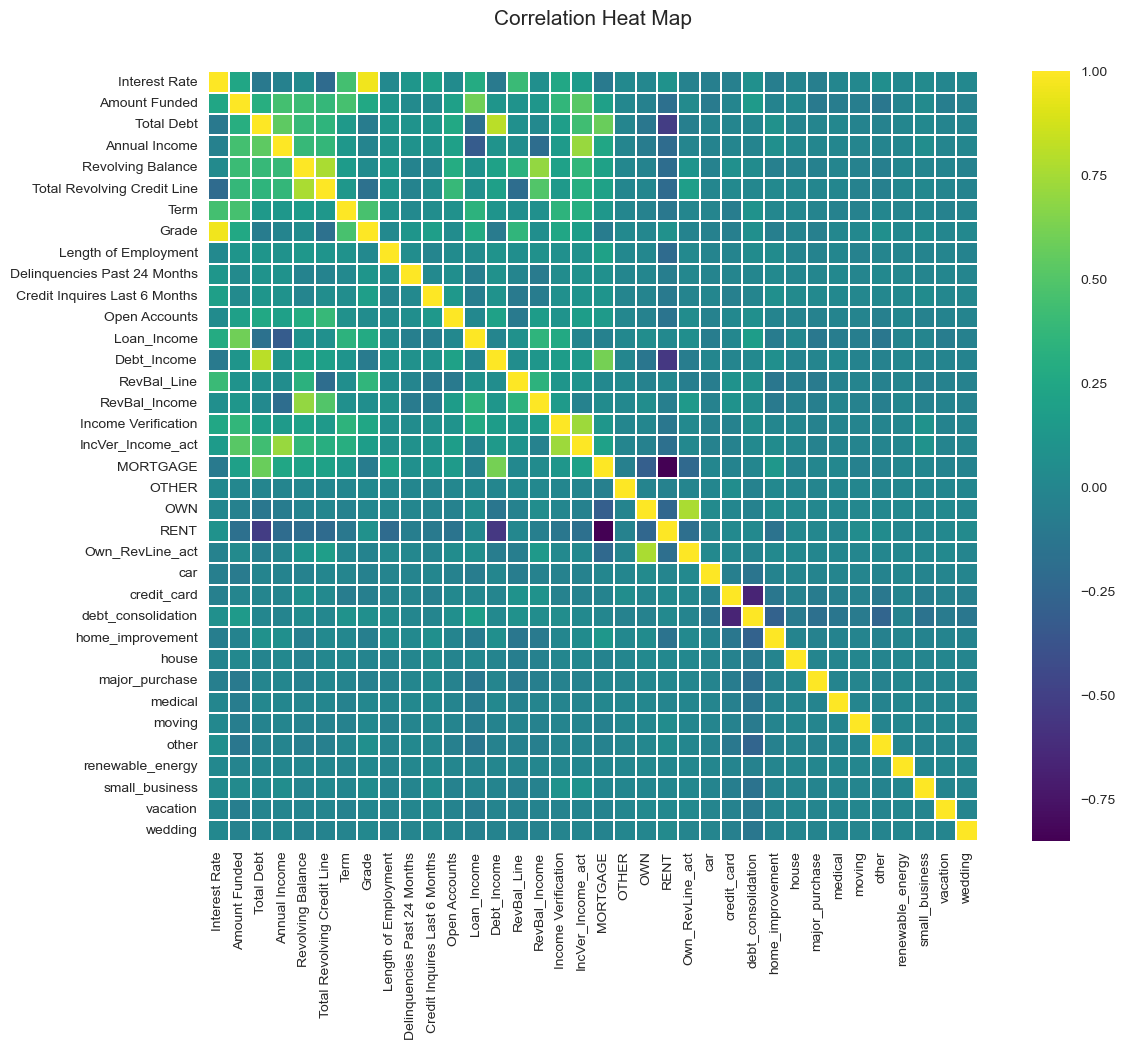

In [76]:
#Code Block 31
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Correlation Heat Map', y=1.05, size=15)
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

### Graphically looking at residuals using lowess

- LOWESS (Locally Weighted Scatterplot Smoothing), is a tool used in regression analysis that creates a smooth line through a scatter plot to help you to see relationship between variables and foresee trends.
- https://www.statisticshowto.com/lowess-smoothing/

In [79]:
#Code Block 32
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred_dm', y='Resid_dm', lowess=True,
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

NameError: name 'df_reg_results' is not defined

<Figure size 2000x1000 with 0 Axes>

In [81]:
#Code Block 33
plt.figure(figsize=(20,10)) #changes area of scatterplot
sns.regplot(x='Int_Pred_le', y='Resid_le', lowess=True,
              data = df_reg_results, scatter_kws={"color":"blue","alpha":0.15, "s":100,"linewidth":2,"edgecolor":"white"}, 
              line_kws={'color': 'black'})

NameError: name 'df_reg_results' is not defined

<Figure size 2000x1000 with 0 Axes>

### See the results in a csv format

In [84]:
#df_reg_results.to_csv('data/df_reg_results.csv')